# Linear Regression

In [1]:
import seaborn as sns

DF = sns.load_dataset('mpg')

## 단순 회귀
- First-Order Function

In [2]:
DF1 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF1.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


### 상관관계 그래프

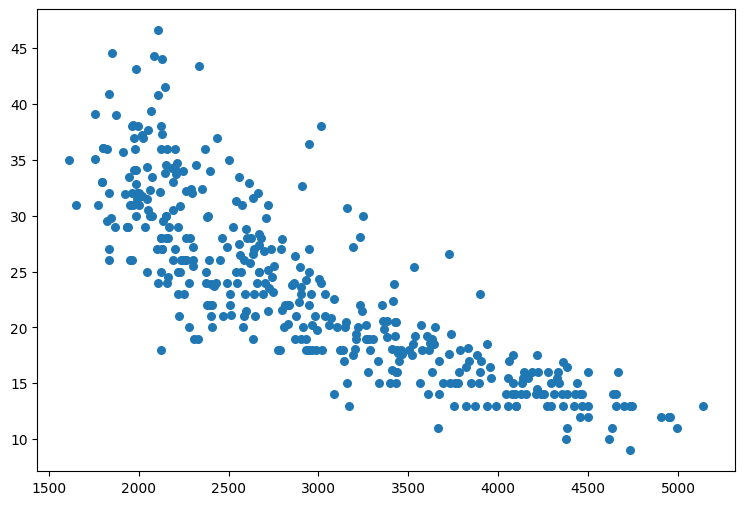

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.scatter(x = DF1.weight, y = DF1.mpg, s = 30)
plt.show()

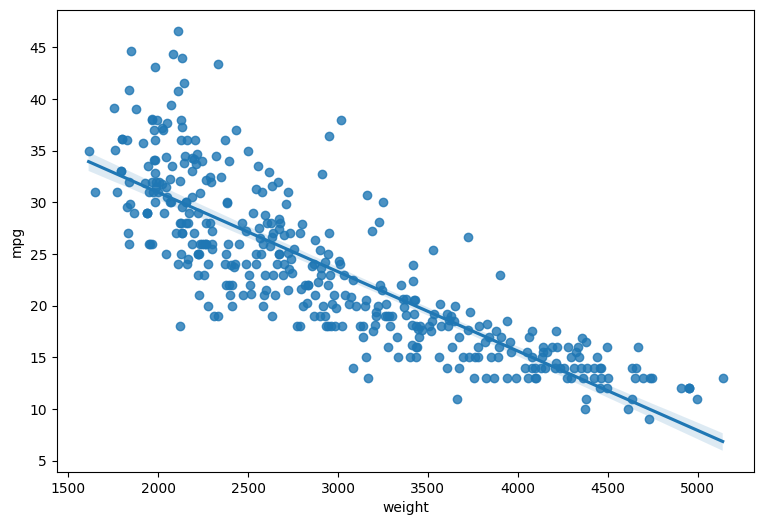

In [4]:
fig = plt.figure(figsize = (9, 6))
sns.regplot(x = 'weight', y = 'mpg', data = DF1, fit_reg = True)
plt.show()

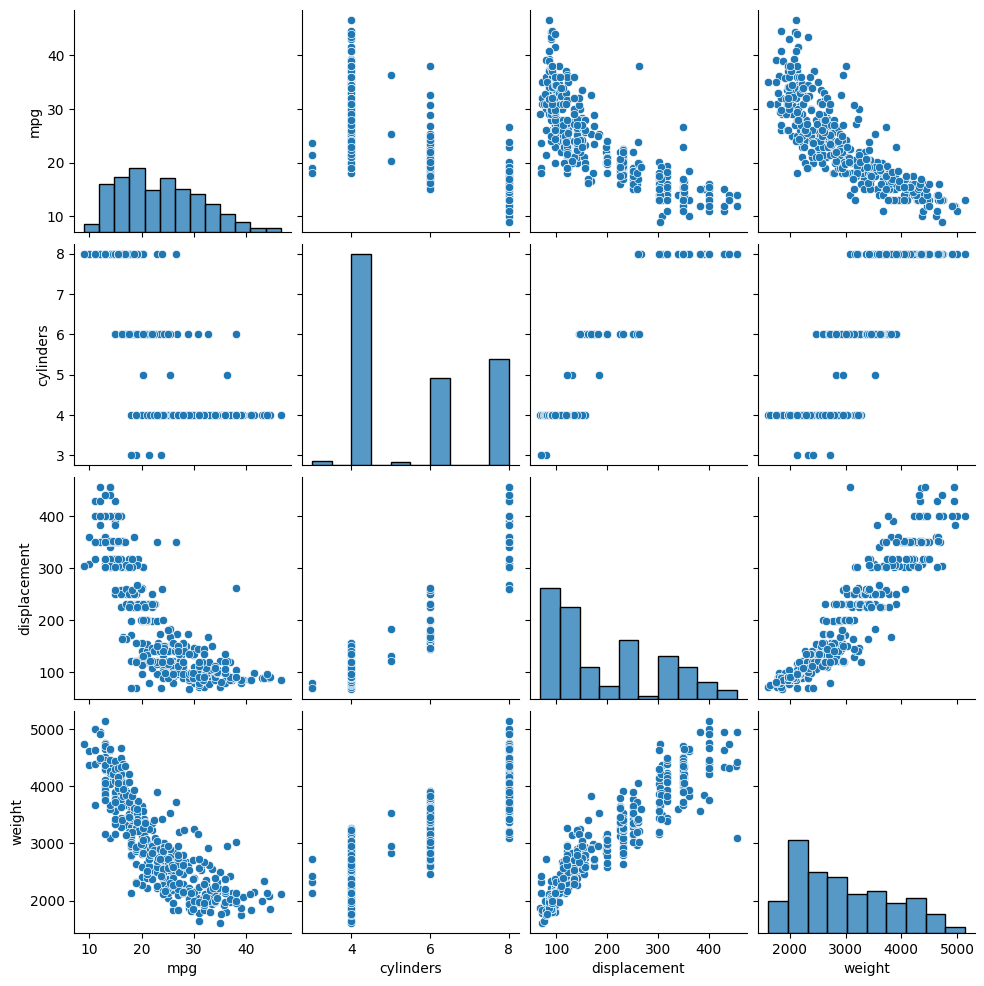

In [5]:
sns.pairplot(DF1)  
plt.show()

### 상관 계수
- pearsons' r

In [6]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.weight)[0]

-0.831740933244335

In [7]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.displacement)[0]

-0.8042028248058991

In [8]:
from scipy import stats

stats.pearsonr(DF1.mpg, DF1.cylinders)[0]

-0.7753962854205523

### Train & Test split

In [9]:
from sklearn.model_selection import train_test_split

X = DF1[['weight']]
y = DF1['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


### 선형 회귀 모델링

- 모델 생성

In [10]:
from sklearn.linear_model import LinearRegression

SR = LinearRegression()
SR.fit(X_train, y_train)

LinearRegression()

In [11]:
print('weight(w) : ', SR.coef_)
print('bias(b) : ', SR.intercept_)

weight(w) :  [-0.00766168]
bias(b) :  46.282236390923615


In [12]:
# 결정 계수 (R-Square)
SR.score(X_test, y_test)

0.7164499678296494

### 모델 평가

In [13]:
# MSE
from sklearn.metrics import mean_squared_error

y_hat_Xtest = SR.predict(X_test)

mean_squared_error(y_test, y_hat_Xtest)

17.01518447782976

### Visualization

/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/298213196.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(SR_y, hist = False, label = 'y') # 전체데이터셋 종속변수(정답데이터)의 분포
/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/298213196.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

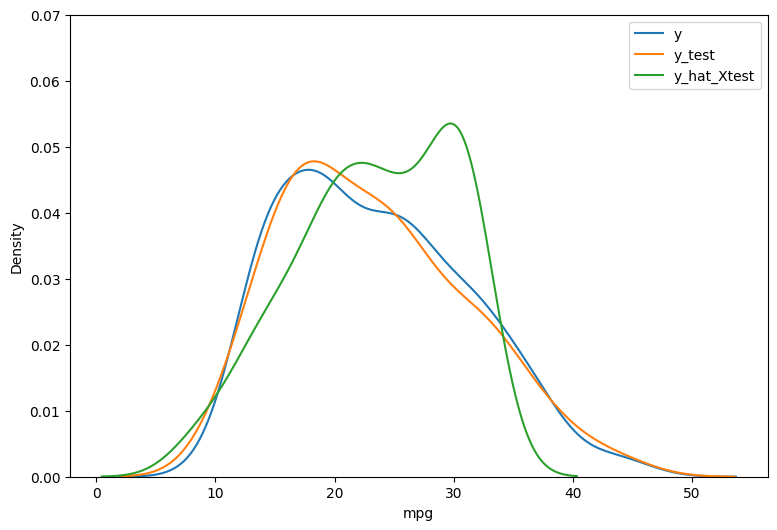

In [14]:
# 실제 정답데이터와 테스트셋 예측값에 대한 분포를 비교해보자
SR_y = y
SR_y_test = y_test
SR_y_hat_Xtest = SR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(SR_y, hist = False, label = 'y') # 전체데이터셋 종속변수(정답데이터)의 분포
ax2 = sns.distplot(SR_y_test, hist = False, label='y_test', ax = ax1) #  테스트셋 종속변수(정답데이터)의 분포
ax3 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1) # 테스트셋 독립변수(미훈련한 30%의 설명데이터)에 대한 회귀예측값의 분포

plt.legend()
plt.ylim(0, 0.07)
plt.show()

## 다항 회귀
- High-Order Function

In [15]:
DF2 = DF[['mpg', 'cylinders', 'horsepower', 'weight']]

DF2.head(3)

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436


### Train & Test split

In [16]:
from sklearn.model_selection import train_test_split

X = DF2[['weight']]
y = DF2['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 1) (278,)
Test Data :  (120, 1) (120,)


### 선형 회귀 모델링

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train) # X전체로 fit하면 안됨, 정답을 미리 알려주는 꼴

print('변환 전 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

변환 전 데이터:  (278, 1)
2차항 변환 데이터:  (278, 2)


- Higth-Order 모델 생성

In [18]:
from sklearn.linear_model import LinearRegression

PR = LinearRegression()
PR.fit(X_train_poly, y_train)

LinearRegression()

In [19]:
import numpy as np
np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ', PR.coef_)
print('bias(b) : ', '%.8f' % PR.intercept_)

weight(w) :  [-0.0175042457  0.0000015338]
bias(b) :  60.88867527


- 결정계수 (R-square)

In [20]:
X_test_poly = poly.transform(X_test)

PR.score(X_test_poly, y_test)

0.752552180832177

### 모델 평가

In [21]:
from sklearn.metrics import mean_squared_error

# X_test_poly = poly.fit_transform(X_test)

mean_squared_error(y_test, PR.predict(X_test_poly))

14.848773810921918

### Visualization
- High-Order Model

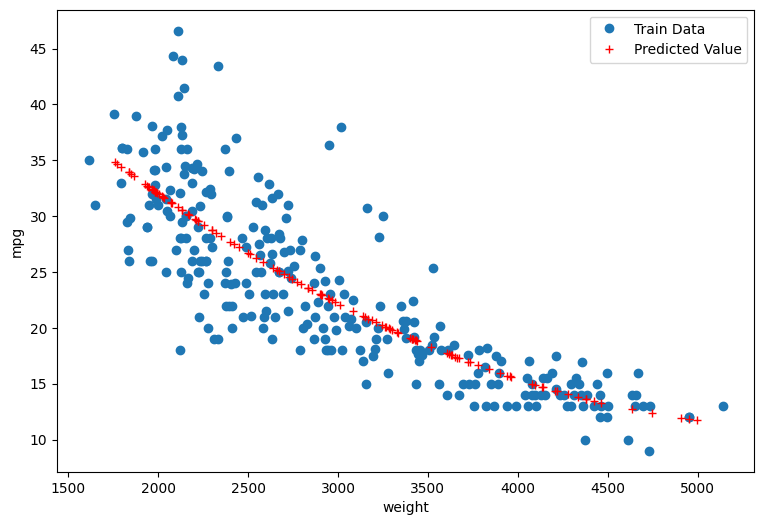

In [22]:
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize=(9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, PR_y_hat_Xtest, 'r+', label = 'Predicted Value')
plt.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/1126195150.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(PR_y, hist=False, label="y")
/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/1126195150.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

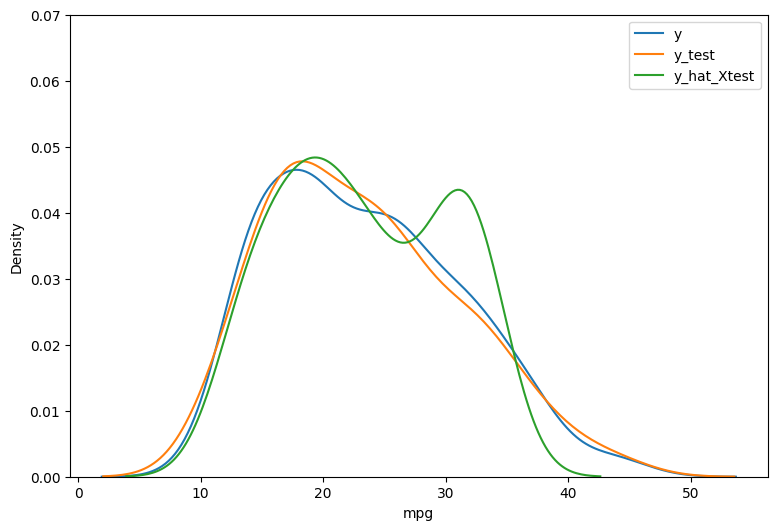

In [23]:
PR_y = y
PR_y_test = y_test
PR_y_hat_Xtest = PR.predict(X_test_poly)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(PR_y, hist=False, label="y")
ax2 = sns.distplot(PR_y_test, hist=False, label="y_test", ax=ax1)
ax3 = sns.distplot(PR_y_hat_Xtest, hist=False, label="y_hat_Xtest", ax=ax1)

plt.legend()
plt.ylim(0, 0.07)
plt.show()

# 다중 회귀

In [24]:
DF3 = DF[['mpg', 'cylinders', 'displacement', 'weight']]

DF3.head(3)

,mpg,cylinders,displacement,weight
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436


### Train & Test split

In [25]:
from sklearn.model_selection import train_test_split

X = DF3[['displacement', 'weight']]
y = DF3['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (278, 2) (278,)
Test Data :  (120, 2) (120,)


### 다중 회귀 모델링

In [26]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()   
MR.fit(X_train, y_train)

LinearRegression()

In [27]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [-0.0176653275 -0.0056727314]
bias(b) :  43.74652237


- 결정 계수 (R-Square)

In [28]:
MR.score(X_test, y_test)

0.720971246285159

In [29]:
# 다중회귀모형은 조정된 결정계수를 봐야한다.
# sklean lR에서 기능을 제공하지 않으므로 추가 계산을 해야함  또는 statsmodel api를 활용할 수있음
1 - (1-MR.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7162015239994352

### 모델 평가

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

16.74387296921419

### Visualization

/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/2071486620.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(MR_y, hist = False, label = 'y')
/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/2071486620.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

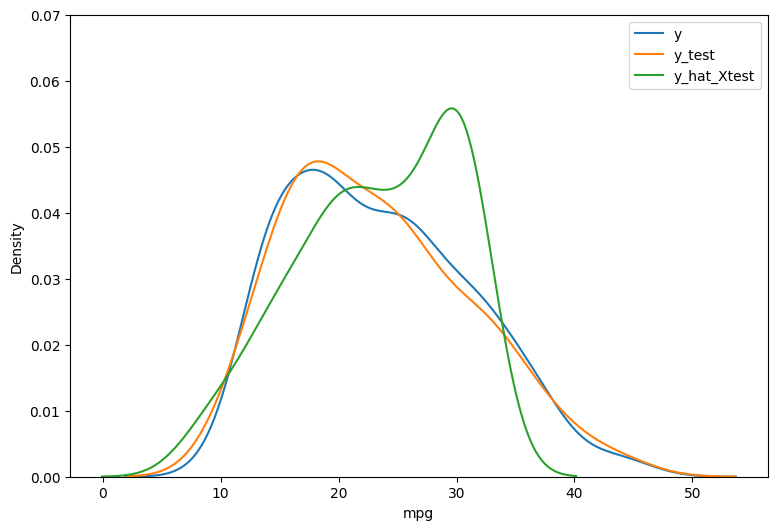

In [31]:
MR_y = y
MR_y_test = y_test
MR_y_hat_Xtest = MR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(MR_y, hist = False, label = 'y')
ax2 = sns.distplot(MR_y_test, hist = False, label = 'y_test')
ax3 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_Xtest', ax = ax1)

plt.ylim(0, 0.07)
plt.legend()
plt.show()

## 비교 시각화

/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/7456713.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
/var/folders/gb/jqxp5nqd3dz14l_g216xwzdm0000gn/T/ipykernel_95729/7456713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

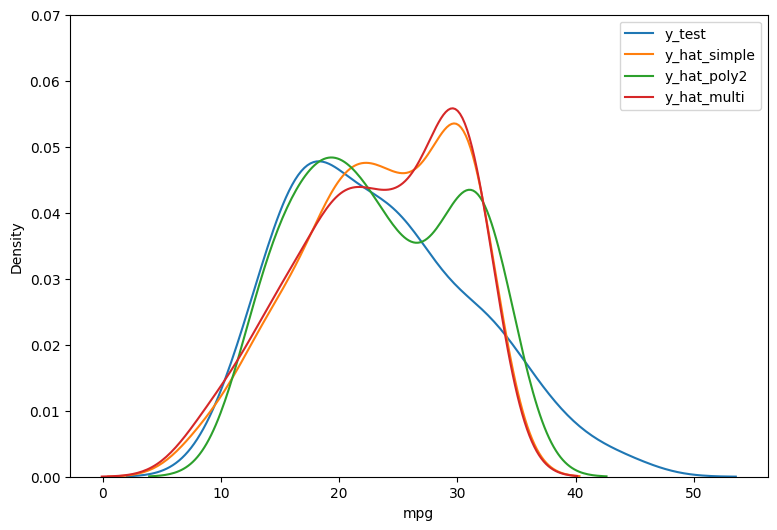

In [32]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test')
ax2 = sns.distplot(SR_y_hat_Xtest, hist = False, label='y_hat_simple', ax = ax1) # 단순회귀
ax3 = sns.distplot(PR_y_hat_Xtest, hist = False, label='y_hat_poly2', ax = ax1) # 다항회귀 2차
ax4 = sns.distplot(MR_y_hat_Xtest, hist = False, label='y_hat_multi', ax = ax1) # 다중회귀
plt.legend()
plt.ylim(0, 0.07)
plt.show()

# 회귀분석 연습하기

- 의료비 지출 예측 모델링

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


## 탐색적 데이터 분석

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns 

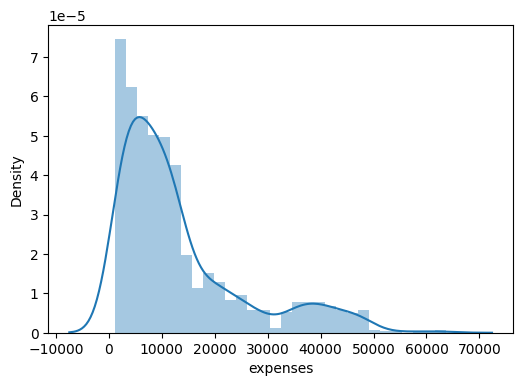

In [47]:
plt.figure(figsize = (6, 4))
sns.distplot(DF.expenses,
             hist = True,
             kde = True)
plt.show()

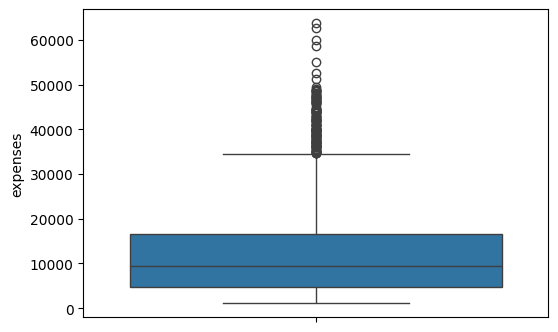

In [48]:
plt.figure(figsize = (6, 4))
sns.boxplot(y = 'expenses', data = DF)
plt.show()

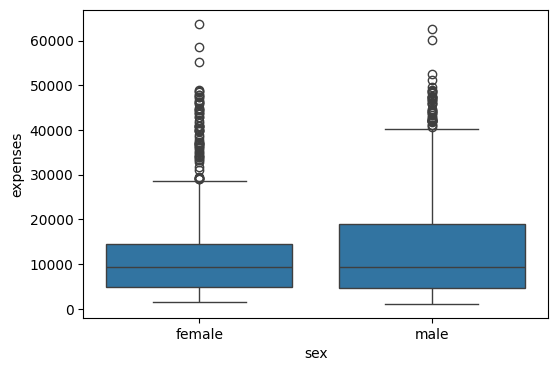

In [49]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'sex', y = 'expenses', data = DF)
plt.show()

In [50]:
DF.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

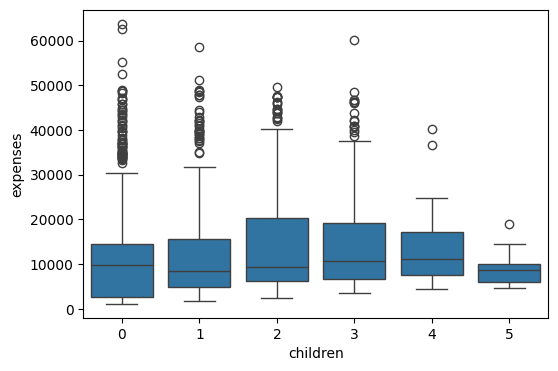

In [55]:
# 자녀수 별 의료비 분포
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'children', y = 'expenses', data = DF)
plt.show()

In [52]:
DF.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

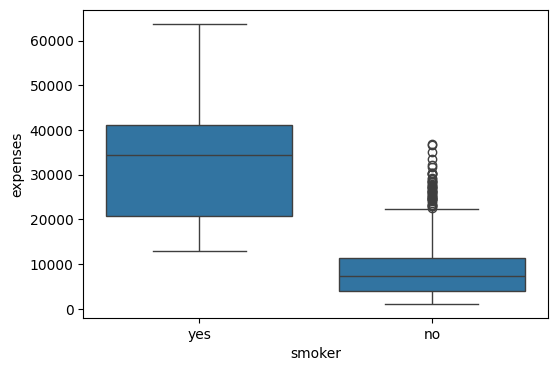

In [54]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'smoker', y = 'expenses', data = DF)
plt.show()

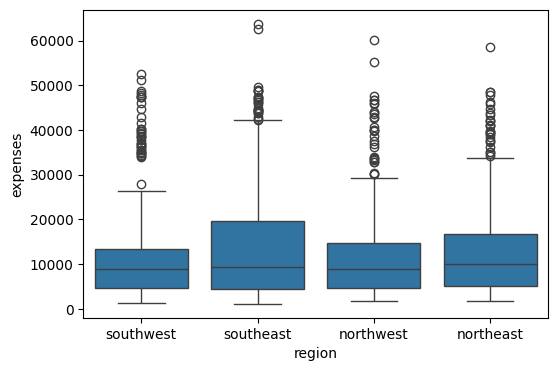

In [56]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'region', y = 'expenses', data = DF)
plt.show()

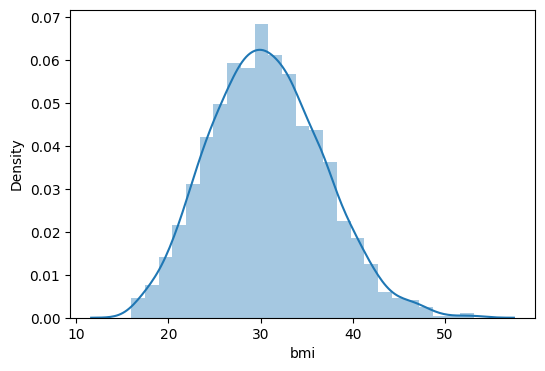

In [57]:
plt.figure(figsize = (6, 4))
sns.distplot(DF.bmi,
             hist = True,
             kde = True)
plt.show()

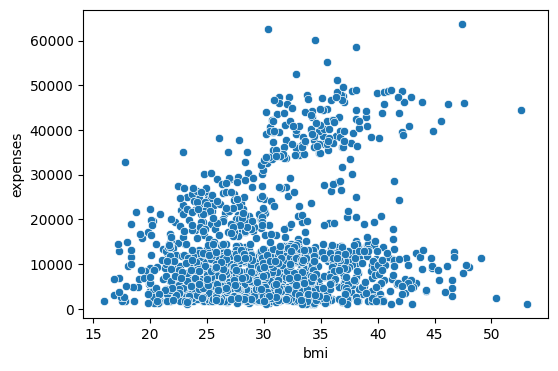

In [58]:
plt.figure(figsize = (6, 4))
sns.scatterplot(x = DF.bmi, y = DF.expenses)
plt.show()

## Modeling

### Integer Encoding

In [59]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
DF['sex'] = encoder1.fit_transform(DF.sex)

In [60]:
encoder2 = LabelEncoder()
DF['smoker'] = encoder2.fit_transform(DF.smoker)

In [61]:
encoder3 = LabelEncoder()
DF['region'] = encoder3.fit_transform(DF.region)

In [62]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### Train & Test Array Split (7:3)

In [63]:
from sklearn.model_selection import train_test_split

X = DF[['age', 'sex']]
y = DF['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 2) (936,)
Test Data :  (402, 2) (402,)


In [64]:
from sklearn.linear_model import LinearRegression

RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression()

In [66]:
y_hat = RA.predict(X_test)

### 오차 값 확인

In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse1 = mean_squared_error(y_test, y_hat)

np.sqrt(mse1)

10633.607635499553

## Modeling - statsmodels

In [68]:
!pip install statsmodels 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 33.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 22.1 MB/s eta 0:00:00


In [69]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data preprocessing

In [70]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(DF,
                                       test_size = 0.3,
                                       random_state = 2045)

train_set.shape, test_set.shape

((936, 7), (402, 7))

In [71]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 8 to 887
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    int64  
 1   sex       936 non-null    object 
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    object 
 5   region    936 non-null    object 
 6   expenses  936 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


### expenses ~ age + sex

- train_set으로 모델 생성
- OLS (Ordinary Least Squares) 사용

In [72]:
import statsmodels.formula.api as smf

Model_1 = smf.ols(formula = 'expenses ~ age + sex',
                  data = train_set).fit()

In [73]:
y_hat_1 = Model_1.predict(test_set[['age', 'sex']])

In [74]:
mse2 = mean_squared_error(test_set.expenses, y_hat_1)

np.sqrt(mse2)

10633.607635499557

In [75]:
print('sklearn     :', np.sqrt(mse1))
print('statsmodels :', np.sqrt(mse2))

sklearn     : 10633.607635499553
statsmodels : 10633.607635499557


# Logistic Regression

## Sigmoid (Activation) Function

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import numpy as np

def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

In [78]:
sigmoid(0)

0.5

In [79]:
sigmoid(100000000)

1.0

### sigmoid 시각화

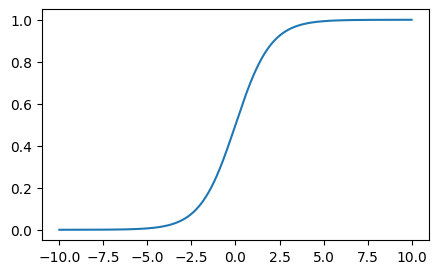

In [81]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (5, 3))
plt.plot(n, sigmoid(n))
plt.show()

## Binary Classification - 분류

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [84]:
DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


### Data preprocessing

In [85]:
X = DF[['balance']]
y = DF['default']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (7000, 1) (7000,)
Test Data :  (3000, 1) (3000,)


### Modeling

In [87]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

In [88]:
y_hat = Model_lr.predict(X_test)

### Model validation

Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test, y_hat)

array([[2888,    8],
       [  72,   32]])

In [91]:
# Yes (연체 기준)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat, labels = ['Yes','No'])

array([[  32,   72],
       [   8, 2888]])

- Accuracy, Precision, Recall - 'No(상환)'

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'No'))
print(recall_score(y_test, y_hat, pos_label = 'No'))

0.9733333333333334
0.9756756756756757
0.9972375690607734


- Accuracy, Precision, Recall - 'Yes(연체)'
  - 예측목표가 연체자를 예측하는 것으로 목적이 명료하므로, yes기준 recall이 핵심 평가지표가 된다.


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Yes'))
print(recall_score(y_test, y_hat, pos_label = 'Yes'))

0.9733333333333334
0.8
0.3076923076923077


- F1_score - No (상환)

In [94]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'No')

0.9863387978142076

- F1_score - Yes (연체)

In [95]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Yes')

0.4444444444444444

### Classification Report

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['No', 'Yes'],
                            digits = 5))

              precision    recall  f1-score   support

          No    0.97568   0.99724   0.98634      2896
         Yes    0.80000   0.30769   0.44444       104

    accuracy                        0.97333      3000
   macro avg    0.88784   0.65246   0.71539      3000
weighted avg    0.96959   0.97333   0.96755      3000



# Cross Entropy Error

In [98]:
import warnings
warnings.filterwarnings('ignore')

## Cross Entropy
- 서로 다른 사건의 확률을 곱하여 Entropy를 계산
  - y : 실제값, y_hat : 예측값(can be incorrect)
- y를 Cross-Entropy의 가중치로 적용
  - Binary Cross-Entropy Error = –y log(y_hat) – (1 - y) log(1 - y_hat)
  - Categorical Cross-Entropy Error = –y * log(y_hat)

## Information Theory

### 발생 확률이 서로 다른 사건 A, B, C - Information Gain
- Information Gain(정보 이득량)
  - 자주 발생하지 않는 사건은 자주 발생하는 사건보다 전달하는 정보량이 많음
  - Information Gain(정보 이득량)은 정보의 희귀성(발생가능성)에 반비례
  - I(x) = –log(P(x))

In [99]:
# 각 사건이 발생할 확률
A = 0.9
B = 0.5
C = 0.1
# 가장 발생할 확률이 낮은 C가 정보량이 가장 높음
print('%.3f' % -np.log(A), '%.3f' % -np.log(B), '%.3f' % -np.log(C))

0.105 0.693 2.303


### AlphaGo와 Apes의 바둑대결 승리 확률 - Degree of Surprise
- 예상하기 어려운 정보에 더 높은 가치를 매기는 것

In [100]:
Alphago = 0.999
Apes = 0.001
# 알파고가 이겼을 때 놀람의 정도보다, 침팬지가 이겼을 때 놀람의 정도가 더 크다.
print('%.3f' % -np.log(Alphago), '%.3f' % -np.log(Apes))

0.001 6.908


## Entropy

- 불확실성의 정도
  - Entropy = E(–log(P(x)))
- 확률변수의 평균 정보량(기댓값)
  - –sum(p(x) * log(p(x)))
- 불확실성(Entropy)이 낮으면 분류정확도가 높아짐

- 승률이 비슷한 두팀의 Entropy

In [101]:
P1 = 0.5
P2 = 0.5

-P1 * np.log(P1) - P2 * np.log(P2)

0.6931471805599453

- 승률 차이가 큰 두팀의 Entropy


In [102]:
P1 = 0.999
P2 = 0.001

-P1 * np.log(P1) - P2 * np.log(P2)

0.007907255112232087